In [1]:
import pandas as pd
import igraph
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv("IgSub2-3_S104_L001.assembled-ACGTACGT-IGH_HUMAN-ighc-clones.csv", sep="\t")
df.head()

,cdr3pep,V_sub,J_sub,C_region,beforeMID,acc
0,CTTVAYDYSNFRYGMDVWGQGTTVT,IGHV3-74,IGHJ6:326,"IGHG2:276,IGHG1:44,IGHG3:5,IGHG4:1",137,326
1,CATSTTSFDPWGQGTLVT,IGHV3-7,IGHJ5:159,"IGHG1:136,IGHG2:16,IGHG3:7",99,159
2,CANEQRYMAVSDWGQGTLVT,IGHV3-7,IGHJ4:186,"IGHG2:149,IGHG1:33,IGHG3:4",99,186
3,CARNIPITPLGYWGQGTLVT,IGHV3-66,IGHJ4:111,"IGHG2:83,IGHG1:26,IGHG3:2",73,111
4,CARGSTGYSNYYFDYWGQGTLVT,IGHV3-74,IGHJ4:96,"IGHG2:72,IGHG1:24",64,96


In [3]:
# Create an empty graph
ids = ["IGHM", "IGHD", "IGHG3", "IGHG1", "IGHA1", "IGHG2", "IGHG4", "IGHE", "IGHA2", "IGHGP"]
g = igraph.Graph(len(ids), directed=True)
g.vs["id"] = range(len(ids))
g.vs["name"] = ids
g.vs["label"] = ids
print(g.vs['name'])

['IGHM', 'IGHD', 'IGHG3', 'IGHG1', 'IGHA1', 'IGHG2', 'IGHG4', 'IGHE', 'IGHA2', 'IGHGP']


In [4]:
# Parse the C_region column
clones = dict()    # count clones
reads = dict()         # count reads
for entry in df["C_region"]:
    gene_entries = entry.split(",")
    gene_names = list()
    for gene_entry in gene_entries:
        gene, count = gene_entry.split(":")
        gene_names.append(gene)      # per CDR3
        clones[gene] = clones.get(gene, 0) + 1  # per donor
        reads[gene] = reads.get(gene, 0) + int(count)  # per donor
    for i in range(len(gene_names) - 1):
        for j in range(i + 1, len(gene_names)):
            geneA = gene_names[i]
            geneB = gene_names[j]
            indexA = ids.index(geneA)
            indexB = ids.index(geneB)
            if indexA > indexB:
                geneA, geneB = geneB, geneA
                indexA, indexB = indexB, indexA
            try:
                g.es[g.get_eid(geneA, geneB)]['weight'] = g.es[g.get_eid(geneA, geneB)]['weight'] + 1
            except:
                g.add_edge(ids.index(geneA), ids.index(geneB), weight=1)
print(clones.keys())

dict_keys(['IGHG2', 'IGHG1', 'IGHG3', 'IGHG4', 'nan'])


In [5]:
# nr of clones per gene
for gene in ids:
    print(gene, clones.get(gene, 0))

IGHM 0
IGHD 0
IGHG3 66
IGHG1 761
IGHA1 0
IGHG2 561
IGHG4 23
IGHE 0
IGHA2 0
IGHGP 0


In [6]:
# nr of reads per gene
for gene in ids:
    print(gene, reads.get(gene, 0))

IGHM 0
IGHD 0
IGHG3 113
IGHG1 2235
IGHA1 0
IGHG2 2141
IGHG4 71
IGHE 0
IGHA2 0
IGHGP 0


In [7]:
df_clones = pd.DataFrame(g.get_adjacency(attribute="weight"), columns=ids, index=ids)
df_clones

,IGHM,IGHD,IGHG3,IGHG1,IGHA1,IGHG2,IGHG4,IGHE,IGHA2,IGHGP
IGHM,0,0,0,0,0,0,0,0,0,0
IGHD,0,0,0,0,0,0,0,0,0,0
IGHG3,0,0,0,29,0,37,6,0,0,0
IGHG1,0,0,0,0,0,168,10,0,0,0
IGHA1,0,0,0,0,0,0,0,0,0,0
IGHG2,0,0,0,0,0,0,10,0,0,0
IGHG4,0,0,0,0,0,0,0,0,0,0
IGHE,0,0,0,0,0,0,0,0,0,0
IGHA2,0,0,0,0,0,0,0,0,0,0
IGHGP,0,0,0,0,0,0,0,0,0,0


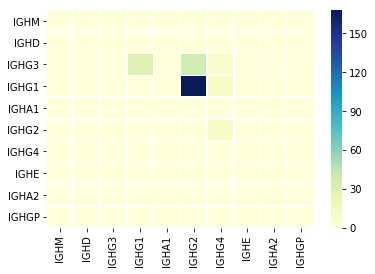

In [8]:
ax = sns.heatmap(df_clones, linewidth=0.5, cmap="YlGnBu")
plt.show()

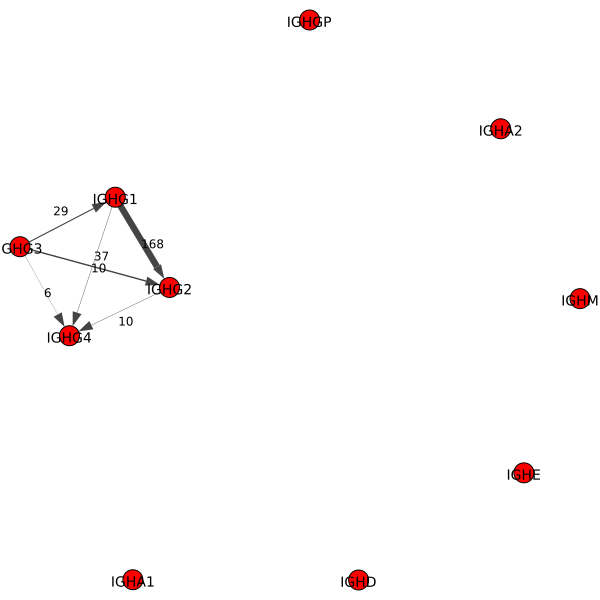

In [9]:
g.es["label"] = g.es["weight"]
total_weight = sum(g.es["weight"])
g.es['width'] = [10*x/total_weight for x in g.es["weight"]]
igraph.plot(g)